In [14]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datafn

In [15]:
data1 = pd.read_csv('numeros.csv', header=None)
data1.replace(np.nan, 0.0, inplace=True)

In [16]:
i = 0
data = []
while True:
    data.append(data1.loc[:,i:i+19])
    i=i+21
    if i >= 10 * 21: break

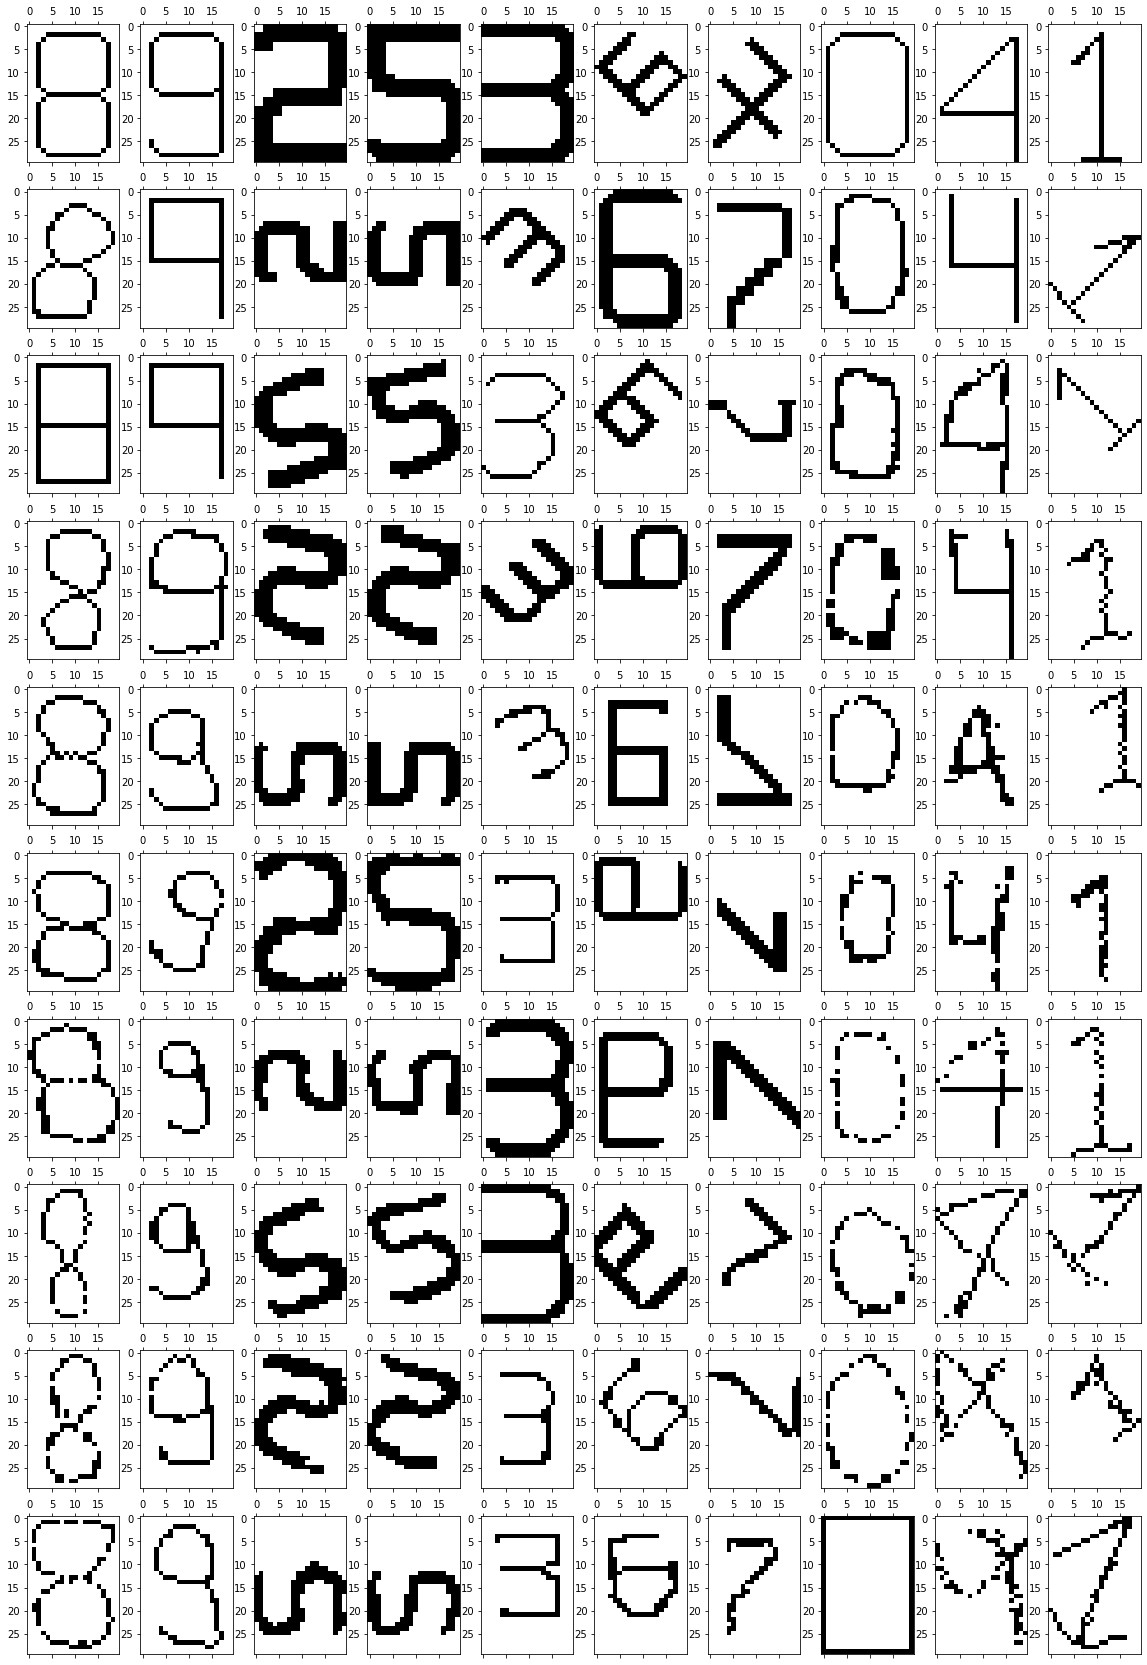

In [17]:
alldata = []
fig, axs = plt.subplots(10, 10)
fig.set_size_inches(20, 30)
k=0
for dt in data:
    i = 0
    j = 0
    while True:
        alldata.append(np.reshape(dt.loc[i:i+29, :].values, [600]))
        axs[j, k].spy(dt.loc[i:i+29, :].values)
        i = i + 31
        j = j + 1
        if i >= 10 * 31: break
    k = k + 1
plt.show()

In [18]:
resuldata = np.asfarray(pd.read_csv('resdat.csv', header=None).values)

In [19]:
rsdata = []
for i in resuldata.tolist():
    for _ in range(10):
        rsdata.append(np.array(i))

In [20]:
tstdat = pd.read_csv('testData.csv', header=None)

In [21]:
testdata = []
i = 0
while True:
    testdata.append(np.reshape(tstdat.loc[:, i:i+19].values, [600]))
    i=i+21
    if i >= 6 * 21: break

In [22]:
model = MLPClassifier(hidden_layer_sizes=[500, 400, 300, 200, 100], max_iter=10000)

In [23]:
model.fit(np.array(alldata), np.array(rsdata))

MLPClassifier(hidden_layer_sizes=[500, 400, 300, 200, 100], max_iter=10000)

In [24]:
predres = model.predict(testdata)

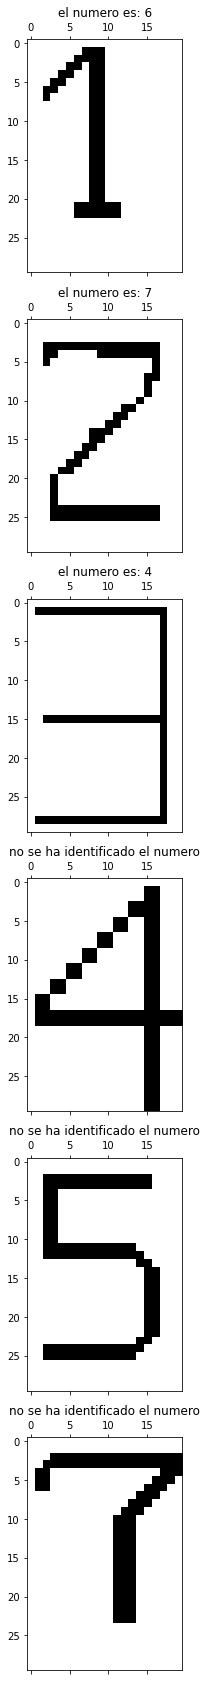

In [25]:
i = 0
fig, axs = plt.subplots(len(testdata))
fig.set_size_inches(20, 30)
while i < len(testdata):
    presetData(axs[i], np.reshape(testdata[i], [30, 20]), predres.tolist()[i])
    i = i + 1
plt.show()